In [2]:
# Import date from datetime
from datetime import date
import pandas as pd

In [3]:
# Create a date object
hurricane_andrew = date(1992, 8, 24)

# Which day of the week is the date?
print(hurricane_andrew.weekday())   # remember that Python counts days of the week starting from Monday as 0, Tuesday as 1, and so on
print(hurricane_andrew.year)
print(hurricane_andrew.month)
print(hurricane_andrew.day)

0
1992
8
24


### Subtracting dates

In [4]:
# Create a date object for May 9th, 2007
start = date(2007, 5, 9)

# Create a date object for December 13th, 2007
end = date(2007, 12, 13)

# Subtract the two dates and print the number of days
delta = (end - start).days
print(delta)

218


In [5]:
from datetime import timedelta
td = timedelta(delta)
start += td
print(start)

2007-12-13


### Counting events per calendar month

In [6]:
florida_hurricane_dates = pd.read_pickle('florida_hurricane_dates.pkl')

In [7]:
# A dictionary to count hurricanes per calendar month
hurricanes_each_month = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6:0, 7: 0, 8:0, 9:0, 10:0, 11:0, 12:0}

# Loop over all hurricanes
for hurricane in florida_hurricane_dates:
  # Pull out the month
  month = hurricane.month
  # Increment the count in your dictionary by one
  hurricanes_each_month[month] += 1
  
print(hurricanes_each_month)

{1: 0, 2: 1, 3: 0, 4: 1, 5: 8, 6: 32, 7: 21, 8: 49, 9: 70, 10: 43, 11: 9, 12: 1}


### Printing dates in a friendly format

In [8]:
# Assign the earliest date to first_date
first_date = min(florida_hurricane_dates)

# Convert to ISO and US formats
iso = "Our earliest hurricane date: " + first_date.isoformat()
us = "Our earliest hurricane date: " + first_date.strftime("%m/%d/%Y")

print("ISO: " + iso)
print("US: " + us)

ISO: Our earliest hurricane date: 1950-08-31
US: Our earliest hurricane date: 08/31/1950


When in doubt, use the ISO format for dates. ISO dates are unambiguous. And if you sort them 'alphabetically', for example, in filenames, they will be in the correct order

### Creating datetimes by hand

In [9]:
# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(2017, 12, 31, 15, 19, 13)

# Replace the year with 1917
dt_old = dt.replace(year=1917)

# Print the results in ISO 8601 format
print(dt_old.isoformat())

1917-12-31T15:19:13


In [10]:
df = pd.read_csv('capital-onebike.csv')
df.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [11]:
#df['Start date'] = pd.to_datetime(df['Start date'])
#df['End date'] = pd.to_datetime(df['End date'])

### Counting events before and after noon

In [12]:
# Create dictionary to hold results
trip_counts = {'AM': 0, 'PM': 0}
  
trips = pd.to_datetime(df['Start date'])    

# Loop over all trips
for trip in trips:
  # Check to see if the trip starts before noon
  if trip.hour < 12:
    # Increment the counter for before noon
    trip_counts['AM'] += 1
  else:
    # Increment the counter for after noon
    trip_counts['PM'] += 1
  
print(trip_counts)

{'AM': 94, 'PM': 196}


### Turning strings into datetimes

In [13]:
# Import the datetime class
from datetime import datetime

# Starting string, in YYYY-MM-DD HH:MM:SS format
s = '2017-02-03 00:00:01'

# Write a format string to parse s
fmt = '%Y-%m-%d %H:%M:%S'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

2017-02-03 00:00:01


### Unix timestamps

In [14]:
# Import datetime
from datetime import datetime

# Starting timestamps
timestamps = [1514665153, 1514664543]

# Datetime objects
dts = []

# Loop
for ts in timestamps:
  dts.append(datetime.fromtimestamp(ts))
  
# Print results
print(dts)

[datetime.datetime(2017, 12, 30, 22, 19, 13), datetime.datetime(2017, 12, 30, 22, 9, 3)]


### Creating timezone aware datetimes

In [15]:
# Import datetime, timedelta, timezone
from datetime import datetime, timedelta, timezone

# Create a timezone for Pacific Standard Time, or UTC-8
pst = timezone(timedelta(hours=-8))

# October 1, 2017 at 15:26:26, UTC-8
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=pst)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26-08:00


### Setting timezones

In [16]:
trips = pd.to_datetime(df['Start date'])

In [17]:
# Create a timezone object corresponding to UTC-4
edt = timezone(timedelta(hours=-4))

trips = pd.to_datetime(df['Start date'])  

# Loop over trips, updating the start datetimes to be in UTC-4
for trip in trips:
  # Update trip['start'] 
  trip = trip.replace(tzinfo=edt)
  print(trip)  

2017-10-01 15:23:25-04:00
2017-10-01 15:42:57-04:00
2017-10-02 06:37:10-04:00
2017-10-02 08:56:45-04:00
2017-10-02 18:23:48-04:00
2017-10-02 18:48:08-04:00
2017-10-02 19:18:10-04:00
2017-10-02 19:37:32-04:00
2017-10-03 08:24:16-04:00
2017-10-03 18:17:07-04:00
2017-10-03 19:24:10-04:00
2017-10-03 20:17:06-04:00
2017-10-03 20:45:21-04:00
2017-10-04 07:04:57-04:00
2017-10-04 07:13:42-04:00
2017-10-04 14:22:12-04:00
2017-10-04 15:07:27-04:00
2017-10-04 15:46:41-04:00
2017-10-04 16:34:44-04:00
2017-10-04 17:26:06-04:00
2017-10-04 17:42:03-04:00
2017-10-05 07:49:02-04:00
2017-10-05 08:26:21-04:00
2017-10-05 08:33:27-04:00
2017-10-05 16:35:35-04:00
2017-10-05 17:53:31-04:00
2017-10-06 08:17:17-04:00
2017-10-06 11:39:40-04:00
2017-10-06 12:59:54-04:00
2017-10-06 13:43:05-04:00
2017-10-06 14:28:15-04:00
2017-10-06 15:50:10-04:00
2017-10-06 16:32:16-04:00
2017-10-06 16:44:08-04:00
2017-10-06 16:53:43-04:00
2017-10-07 11:38:55-04:00
2017-10-07 14:03:36-04:00
2017-10-07 14:20:03-04:00
2017-10-07 1

In [18]:
# Create a timezone object corresponding to UTC-4
edt = timezone(timedelta(hours=-4))

new_trips = []

# Loop over trips, updating the start datetimes to be in UTC-4
for i in range(10):
    # Update trip['start'] and trip['end']
    #print(trips[i])
    new_trips.append(trips[i].replace(tzinfo=edt))
                     
print(new_trips)

[Timestamp('2017-10-01 15:23:25-0400', tz='UTC-04:00'), Timestamp('2017-10-01 15:42:57-0400', tz='UTC-04:00'), Timestamp('2017-10-02 06:37:10-0400', tz='UTC-04:00'), Timestamp('2017-10-02 08:56:45-0400', tz='UTC-04:00'), Timestamp('2017-10-02 18:23:48-0400', tz='UTC-04:00'), Timestamp('2017-10-02 18:48:08-0400', tz='UTC-04:00'), Timestamp('2017-10-02 19:18:10-0400', tz='UTC-04:00'), Timestamp('2017-10-02 19:37:32-0400', tz='UTC-04:00'), Timestamp('2017-10-03 08:24:16-0400', tz='UTC-04:00'), Timestamp('2017-10-03 18:17:07-0400', tz='UTC-04:00')]


In [19]:
trips[1].replace(tzinfo=edt)

Timestamp('2017-10-01 15:42:57-0400', tz='UTC-04:00')

### What time did the bike leave in UTC?

In [20]:
# Loop over the trips
for trip in new_trips:
    # Pull out the start
    dt = trip
    # Move dt to be in UTC
    dt = dt.astimezone(timezone.utc)

    # Print the start time in UTC
    print('Original:', trip, '| UTC:', dt.isoformat())

Original: 2017-10-01 15:23:25-04:00 | UTC: 2017-10-01T19:23:25+00:00
Original: 2017-10-01 15:42:57-04:00 | UTC: 2017-10-01T19:42:57+00:00
Original: 2017-10-02 06:37:10-04:00 | UTC: 2017-10-02T10:37:10+00:00
Original: 2017-10-02 08:56:45-04:00 | UTC: 2017-10-02T12:56:45+00:00
Original: 2017-10-02 18:23:48-04:00 | UTC: 2017-10-02T22:23:48+00:00
Original: 2017-10-02 18:48:08-04:00 | UTC: 2017-10-02T22:48:08+00:00
Original: 2017-10-02 19:18:10-04:00 | UTC: 2017-10-02T23:18:10+00:00
Original: 2017-10-02 19:37:32-04:00 | UTC: 2017-10-02T23:37:32+00:00
Original: 2017-10-03 08:24:16-04:00 | UTC: 2017-10-03T12:24:16+00:00
Original: 2017-10-03 18:17:07-04:00 | UTC: 2017-10-03T22:17:07+00:00


### Using tz database to get the right time zone

In [38]:
# Import tz
from dateutil import tz

# Create a timezone object for Eastern Time
et = tz.gettz('America/New_York')

# Loop over trips, updating the datetimes to be in Eastern Time
for trip in new_trips:
  # Update trip
  trip = trip.replace(tzinfo=et)
  print(trip)  

2017-10-01 15:23:25-04:00
2017-10-01 15:42:57-04:00
2017-10-02 06:37:10-04:00
2017-10-02 08:56:45-04:00
2017-10-02 18:23:48-04:00
2017-10-02 18:48:08-04:00
2017-10-02 19:18:10-04:00
2017-10-02 19:37:32-04:00
2017-10-03 08:24:16-04:00
2017-10-03 18:17:07-04:00


Time zone rules actually change quite frequently. IANA time zone data gets updated every 3-4 months, as different jurisdictions make changes to their laws about time or as more historical information about timezones are uncovered. tz is smart enough to use the date in your datetime to determine which rules to use historically.

### move a datetime from one timezone into another, use .astimezone() and tz

In [63]:
# Create the timezone object
uk = tz.gettz('Europe/London')

# Pull out the start of the first trip
local = new_trips[0]

# What time was it in the UK?
notlocal = local.astimezone(uk)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-01T20:23:25+01:00


In [64]:
# Create the timezone object
ist = tz.gettz('Asia/Kolkata')

# Pull out the start of the first trip
local = new_trips[0]

# What time was it in India?
notlocal = local.astimezone(ist)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-02T00:53:25+05:30


### How many hours elapsed around daylight saving?

In [68]:
# Import datetime, timedelta, tz, timezone
from datetime import datetime, timedelta, timezone
from dateutil import tz

# Start on March 12, 2017, midnight, then add 6 hours
start = datetime(2017, 3, 12, tzinfo = tz.gettz('America/New_York'))
end = start + timedelta(hours=6)
print(start.isoformat() + " to " + end.isoformat())

# How many hours have elapsed?
print((end - start).total_seconds()/(60*60))

# What if we move to UTC?
print((end.astimezone(tz.gettz('UTC')) - start.astimezone(tz.gettz('UTC'))).total_seconds()/(60*60))

2017-03-12T00:00:00-05:00 to 2017-03-12T06:00:00-04:00
6.0
5.0


You added 6 hours, and got 6 AM, despite the fact that the clocks springing forward means only 5 hours would have actually elapsed!

When we compare times in local time zones, everything gets converted into clock time. Remember if you want to get absolute time differences, always move to UTC!

In [69]:
# Import datetime and tz
from datetime import datetime
from dateutil import tz

# Create starting date
dt = datetime(2000, 3, 29, tzinfo = tz.gettz('Europe/London'))

# Loop over the dates, replacing the year, and print the ISO timestamp
for y in range(2000, 2011):
  print(dt.replace(year=y).isoformat())

2000-03-29T00:00:00+01:00
2001-03-29T00:00:00+01:00
2002-03-29T00:00:00+00:00
2003-03-29T00:00:00+00:00
2004-03-29T00:00:00+01:00
2005-03-29T00:00:00+01:00
2006-03-29T00:00:00+01:00
2007-03-29T00:00:00+01:00
2008-03-29T00:00:00+00:00
2009-03-29T00:00:00+00:00
2010-03-29T00:00:00+01:00


As you can see, the rules for Daylight Saving are not trivial. When in doubt, always use tz instead of hand-rolling timezones, so it will catch the Daylight Saving rules (and rule changes!) for you.

### Finding ambiguous datetimes

In [71]:
# Loop over trips
for trip in new_trips:
  # Rides with ambiguous start
  if tz.datetime_ambiguous(trip):
    print("Ambiguous start at " + str(trip))
    trip = tz.enfold(trip)
    trip = trip.astimezone(tz.gettz('UTC'))
    print(trip)

Avoid ambiguous datetimes in practice by storing datetimes in UTC.

### dealing with pandas

In [93]:
# Load CSV into the rides variable
rides = pd.read_csv('capital-onebike.csv', 
                    parse_dates = ['Start date', 'End date'])

# Print the initial (0th) row
print(rides.iloc[0])

Start date                        2017-10-01 15:23:25
End date                          2017-10-01 15:26:26
Start station number                            31038
Start station                    Glebe Rd & 11th St N
End station number                              31036
End station             George Mason Dr & Wilson Blvd
Bike number                                    W20529
Member type                                    Member
Name: 0, dtype: object


In [94]:
# Subtract the start date from the end date
ride_durations = rides['End date'] - rides['Start date']

# Convert the results to seconds
rides['Duration'] = ride_durations.dt.total_seconds()

print(rides['Duration'].head())

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64


### How many joyrides?

In [95]:
# Create joyrides
joyrides = (rides['Start station'] == rides['End station'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]['Duration'].median()))

6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds


### Resampling by datetime (like group by)

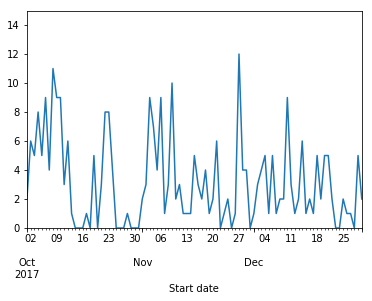

In [96]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to daily, take the size, plot the results
rides.resample('D', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 15])

# Show the results
plt.show()

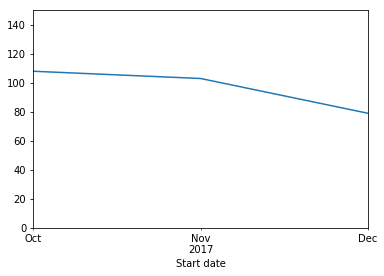

In [97]:
# Resample rides to monthly, take the size, plot the results
rides.resample('M', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 150])

# Show the results
plt.show()

### Members vs casual riders over time

In [98]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.resample('M', on='Start date')['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64


### Combining groupby() and resample()

In [99]:
# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type')\
  .resample('M', on='Start date')

# Print the median duration for each group
print(grouped['Duration'].median())

Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration, dtype: float64


It looks like casual riders consistently took longer rides, but that both groups took shorter rides as the months went by.

### Timezones in Pandas

In [100]:
rides['Duration'].min()   # negative value because of ambiguous timezones

-3346.0

In [101]:
# Localize the Start date column to America/New_York
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', ambiguous='NaT')
rides['End date'] = rides['End date'].dt.tz_localize('America/New_York', ambiguous='NaT')

# Print first value
print(rides['Start date'].iloc[0])

2017-10-01 15:23:25-04:00


### How long per weekday?

In [102]:
# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['Start date'].dt.weekday_name

# Print the median trip time per weekday
print(rides.groupby('Ride start weekday')['Duration'].median())

Ride start weekday
Friday       724.5
Monday       810.5
Saturday     462.0
Sunday       917.0
Thursday     652.0
Tuesday      641.5
Wednesday    585.0
Name: Duration, dtype: float64


### How long between rides?

In [103]:
# Shift the index of the end date up one; now subract it from the start date
# to Calculate the difference in the Start date of the current row and the End date of the previous row and assign it to rides['Time since']
rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample('M', on='Start date')

# Print the average hours between rides each month
print(monthly['Time since'].mean()/(60*60))

Start date
2017-10-31 00:00:00-04:00    5.519242
2017-11-30 00:00:00-05:00    7.256474
2017-12-31 00:00:00-05:00    9.202380
Name: Time since, dtype: float64
